이번에 사용할 데이터 셋은 영화 리뷰 데이터 셋이며  
감성평에 따라 긍정과 부정으로 분류되어 있다.  
총 50,000개의 샘플이 있고 훈련 25,000개, 테스트 25,000개다.  
  
---
  
텍스트 데이터의 경우, 단어를 숫자 데이터로 바꾸는 방법은  
데이터에 등장하는 단어마다 고유정수를 부여하는 것이다.  
예를 들면 he는 10, the는 12 이런식으로 말이다.  
  
영어를 기준으로, 모두 소문자로 바꾸고 구둣점을 지우고  
공백을 기준으로 분리한다.  
이렇게 분리된 단어를 토큰이라고 한다.  
  
토큰에 할당하는 정수 중에는 특정 용도로 예약된 경우가 많다.  
예를 들어, 0은 패딩, 1은 문장 시작, 2는 어휘 사전에 없는 토큰을 나타낸다.  


이번에 사용할 데이터 셋은 이미 정수로 바꾼 데이터가 포함되어 있다.  
이 데이터를 가져와 보자

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
# 우선 훈련세트와 테스트 세트 크기를 확인
print(train_input.shape, test_input.shape)

(25000,) (25000,)


선술했듯 각각 2만 5000개씩 있다.

---

이번엔 1 ~ 2 번째 리뷰의 길이를 출력해보자

In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


리뷰들의 길이가 다 다르다.  
첫 번째 리뷰에 담긴 내용을 보자

In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


각 모든 단어가 정수로 변환되어 있다.  
어휘 사전에 없는 단어는 모두 2로 표시된다.  
이번에는 타깃 데이터를 출력해 보자

In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


20개를 출력한 것, 타깃 값이 부정은 0, 긍정은 1로 나뉜다.  

---

훈련 세트에서 크기가 25,000개 였으므로 20%를 검증세트로 떼어놓으면 훈련 세트의 크기는 20,000개로 줄어들 것이다.

In [8]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state =42)

우선 배열 준비

In [9]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

배열에서 리뷰 길이의 평균과 중간값을 구해보자

In [10]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 개수는 239개, 중간값은 178이다.  
이는 데이터가 한 쪽에 치우쳐져 있음을 마랳준다.  
히스토그램으로 표현해보자

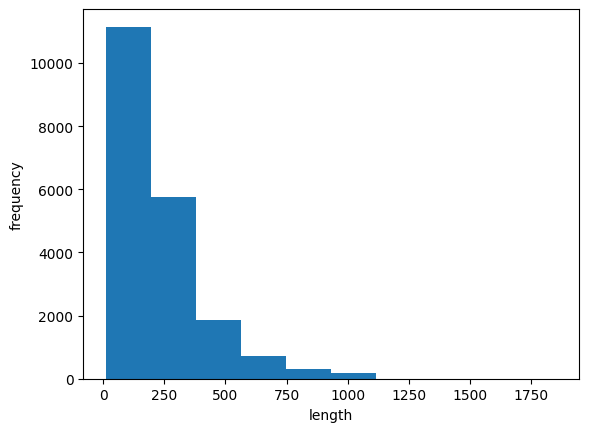

In [11]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

단어가 100개도 안되는 리뷰들은 길이를 100에 맞추어야 한다.  
이때 사용하는 것이 바로 패딩이다.  
인풋의 길이를 100으로 맞추자.  

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [13]:
print(train_seq.shape)

(20000, 100)


이제 길이를 100으로 맞춘 (20000, 100) 크기의 2차원 배열이 되었다.  
첫 번째 샘플을 출력해보자

In [15]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


이 샘플의 앞이나 뒤 어디가 짤렸는지 알 수 없다.  
원본과 비교해보자

In [16]:
print(train_input[0][-10:]) # 원본의 첫 번째 샘플에서 끝에서 10개를 출력

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


이를 통해 앞부분이 잘렸다는 것을 알 수 있다.  
자르는 함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 자른다.  
이러는 이유는 일반적으로 뒷부분 정보가 더 유용할 것으로 기대되기 때문이다.  
만약 뒷 부분을 잘라내고 싶다면  
pad_sequences() 함수의 truncating 매개변수 값을 기본값인 pre가 아닌 post로 바꾸면 된다.  

6 번째 샘플을 출력해보자

In [17]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]
